# Прак № 1 

## Задача 1

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
theta = 10
n = 10000

sample = sts.uniform(0, theta).rvs(n, random_state=17)

In [3]:
sample[:10].mean()


4.137992195676044

In [4]:
def gen_plot_estimate(theta, ylim, n=10000, all=False):
    x = list(range(1, n))    
    sample = sts.uniform(0, theta).rvs(n, random_state=17)

    double_mean_values = []
    for i in x:
        double_mean_values.append(np.abs(theta - 2 * sample[:i].mean()))

    mean_plus_half_of_max_values = []
    for i in x:
        mean_plus_half_of_max_values.append(np.abs(theta - sample[:i].mean() - sample[:i].max() / 2))
    
    if (all == True):
        n_plus_1_min_values = []
        for i in x:
            n_plus_1_min_values.append(np.abs(theta - (n + 1) * sample[:i].min()))

    min_plus_max_values = []
    for i in x:
        min_plus_max_values.append(np.abs(theta - sample[:i].min() - sample[:i].max()))

    n_plus_1_divided_by_n_max = []
    for i in x:
        n_plus_1_divided_by_n_max.append(np.abs(theta - (n + 1) / n * sample[:i].max()))

    plt.figure(figsize=(14, 10))
    plt.plot(x, double_mean_values, label='2*X.mean()', color='green')
    plt.plot(x, mean_plus_half_of_max_values, label='X.mean()+X.max()/2', color='red')
    if (all == True):
        plt.plot(x, n_plus_1_min_values, label='(n+1)*X.min()', color='blue')
    plt.plot(x, min_plus_max_values, label='X.min()+X.max()', color='yellow')
    plt.plot(x, n_plus_1_divided_by_n_max, label='(n+1)/n*X.max()', color='violet')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('N = {}, theta = {}'.format(n, theta))
    plt.ylim(0,ylim)

    print(double_mean_values[-1],' difference theta and 2*X.mean()')
    print(mean_plus_half_of_max_values[-1],' difference theta and X.mean()+X.max()/2')
    if (all == True):
        print(n_plus_1_min_values[-1],' difference theta and (n+1)*X.min()')
    print(min_plus_max_values[-1],' difference theta and X.min()+X.max()')
    print(n_plus_1_divided_by_n_max[-1],' difference theta and (n+1)/n*X.max()')

0.04305625499990473  difference theta and 2*X.mean()
0.022034997959205604  difference theta and X.mean()+X.max()/2
3.162752539334857  difference theta and (n+1)*X.min()
0.0008300345430773959  difference theta and X.min()+X.max()
0.000513842292598099  difference theta and (n+1)/n*X.max()


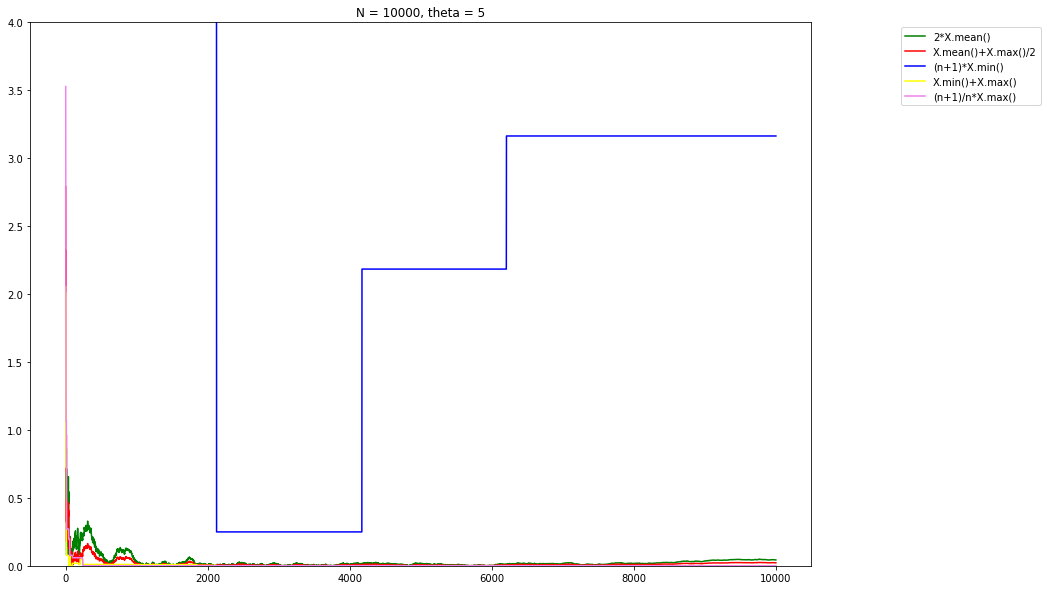

In [5]:
gen_plot_estimate(5, 4, all=True)

Оценка $(n+1)*X_{(1)}$ слишком сильно отличается от истинного значения параметра, исключу её из рассмотрения.

При $n = 10000,\  \theta = 5$ наилучшей оценкой оказалась оценка $\dfrac{n+1}{n}*X_{(n)}$

0.43056254999904553  difference theta and 2*X.mean()
0.22034997959205427  difference theta and X.mean()+X.max()/2
0.008300345430775735  difference theta and X.min()+X.max()
0.00513842292598099  difference theta and (n+1)/n*X.max()


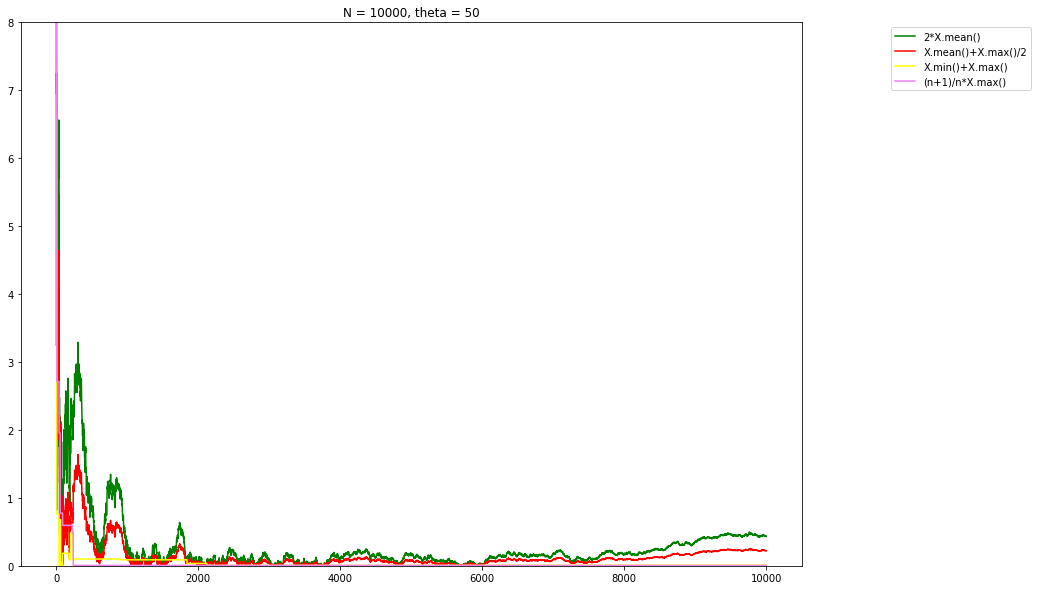

In [6]:
gen_plot_estimate(50, 8)

При $n = 10000,\  \theta = 50$ наилучшей оценкой оказалась оценка $\dfrac{n+1}{n}*X_{(n)}$

8.611250999980939  difference theta and 2*X.mean()
4.4069995918411  difference theta and X.mean()+X.max()/2
0.16600690861548628  difference theta and X.min()+X.max()
0.10276845851967664  difference theta and (n+1)/n*X.max()


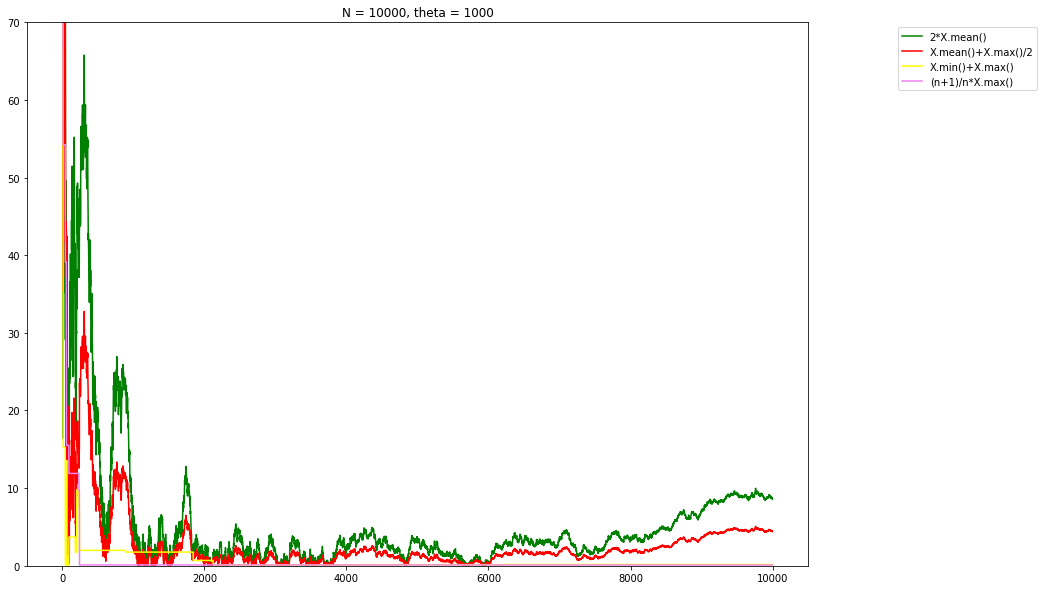

In [7]:
gen_plot_estimate(1000, 70)

При $n = 10000,\  theta = 1000$ наилучшей оценкой оказалась оценка $\dfrac{n+1}{n}*X_{(n)}$

В смысле разности модуля оценки и параметра оценка $\dfrac{n+1}{n}*X_{(n)}$ является наилучшей при  $ n = 10000\  и\ различных\  \theta$

## Задача 2

In [8]:
import math

def gen_plot_estimate_exp(theta, ks, ylim, n=10000, all=False):
    x = list(range(1, n))    
    sample = sts.expon(theta).rvs(n, random_state=17)
    values = []
    for k in ks:
        estimation = []
        for i in x:
            estimation.append(np.abs(theta - (math.factorial(k) / (sample[:i] ** k).mean()) ** (1 / k)))
        values.append(estimation)

    plt.figure(figsize=(14, 10))
    for i in range(len(ks)):
        plt.plot(x, values[i], label='k = {}'.format(ks[i]))
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('N = {}, theta = {}'.format(n, theta))
    plt.ylim(0,ylim)

Wall time: 26.2 s


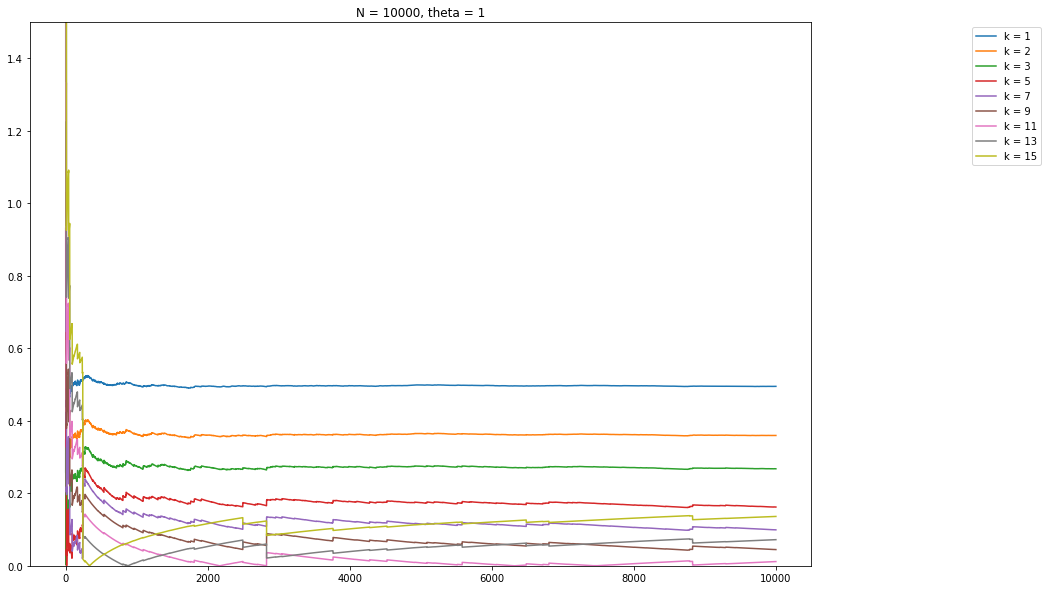

In [19]:
%%time
gen_plot_estimate_exp(1, [1, 2, 3, 5, 7, 9, 11, 13, 15], 1.5)

Замечу, что при k = 11 оценка является наилучшей из рассмотренных.

## Задача 3

Пусть случайная величина $\xi$ распределение имеет плотность $p(x)=\frac{5}{x^6}$ при $x\in[1, +∞)$ и 0 иначе. Тогда $E\xi^4=5$, a $E\xi^5$ расходится.

Функция распределения случайной величины будет иметь вид $F(x) = 1 -\frac{1}{x^5}$

In [20]:
n = 10000

In [21]:
from scipy import stats
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
         return np.where(x >= 1 , 1 - 1 / x ** 5, 0)

spec_dist = deterministic_gen(name="deterministic")

Смотрите, мое распределение правда удовлетворяет условиям

In [22]:
for i in range(1, 6):
    print('{} moment is {}'.format(i, spec_dist.moment(i)))

1 moment is 1.2499999999999971
2 moment is 1.6666666666666534
3 moment is 2.499999999999803
4 moment is 4.999999999995727
5 moment is inf


C:\Users\gonch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1618: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


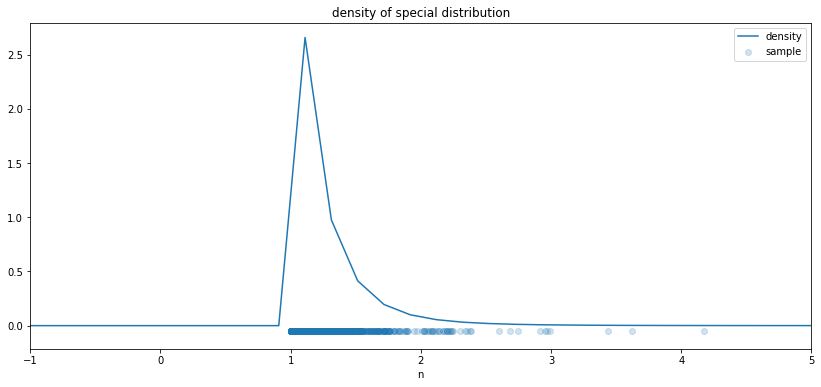

In [23]:
x = np.linspace(-10, 10, 100)
pdf_sample = spec_dist.pdf(x)
plt.figure(figsize=(14,6))
sample = spec_dist.rvs(size=1000)
plt.plot(x, pdf_sample, label='density')
plt.xlim((-1, 5))
plt.scatter(sample, np.zeros(len(sample)) - 0.05, alpha=0.2, label='sample')
plt.xlabel('n')
plt.title('density of special distribution')
plt.legend()

C:\Users\gonch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\gonch\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'dependencies difference of estimated and theoretical variances cauchy distribution from size of sample')

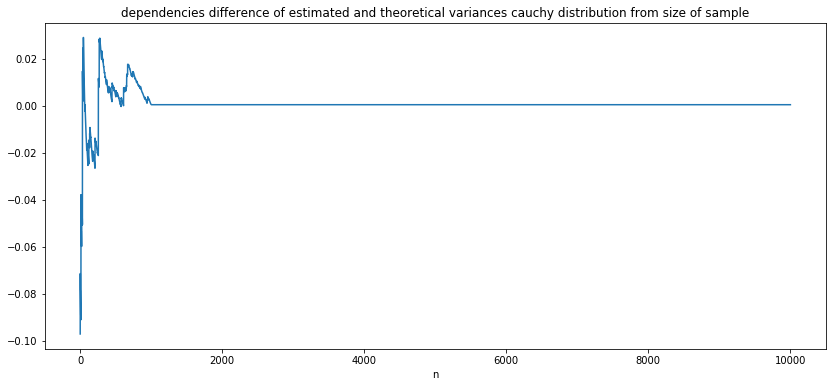

In [24]:
x = list(range(1, n+1))
var_values = []
for i in range(1, n + 1):
    var_values.append(np.var(sample[:i], ddof=1))
plt.figure(figsize=(14,6))
plt.plot(x, var_values - spec_dist.var())
plt.xlabel('n')
plt.title('dependencies difference of estimated and theoretical variances cauchy distribution from size of sample')

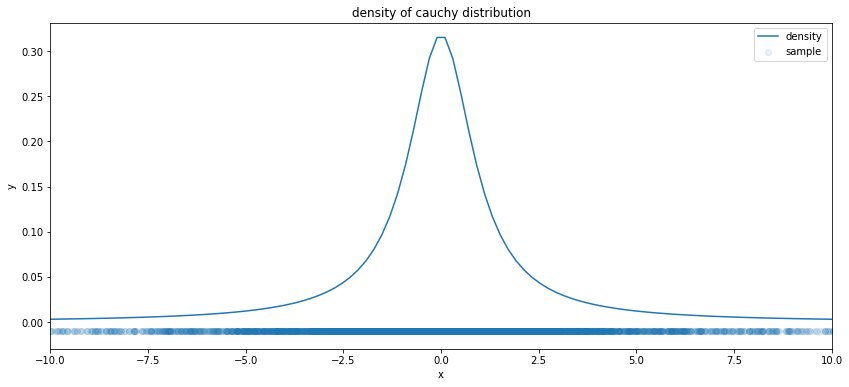

In [25]:
x = np.linspace(-10, 10, 100)
pdf_sample = sts.cauchy.pdf(x)
plt.figure(figsize=(14,6))
sample = sts.cauchy.rvs(size=10000)
plt.plot(x, pdf_sample, label='density')
plt.xlim((-10, 10))
plt.scatter(sample, np.zeros(len(sample)) - 0.01, alpha=0.1, label='sample')
plt.ylabel('y')
plt.xlabel('x')
plt.title('density of cauchy distribution')
plt.legend()

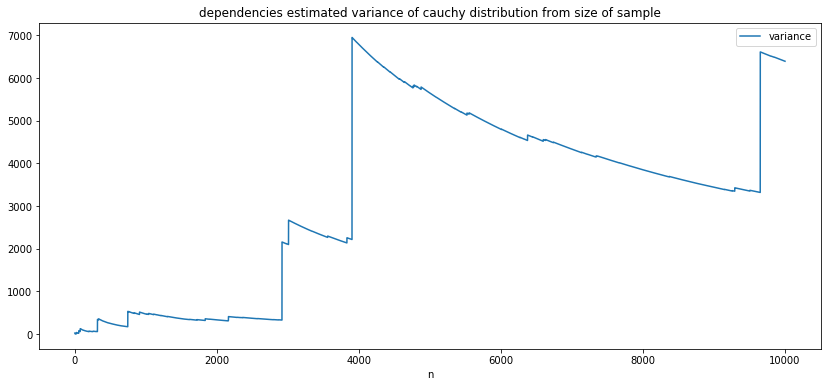

In [26]:
x = list(range(1, n+1))
var_values = []
for i in range(1, n + 1):
    var_values.append(np.var(sample[:i], ddof=1))
plt.figure(figsize=(14,6))
plt.plot(x, var_values, label="variance")
plt.xlabel('n')
plt.title('dependencies estimated variance of cauchy distribution from size of sample')
plt.legend()

## Задача 4

In [27]:
n = 10000
norm_rv = sts.norm()
sample = norm_rv.rvs(n)

In [28]:
ns = [10, 25, 50, 100, 1000, 10000]

In [113]:
def compute_empirical_cdf(sample, n):
    vec_dist_val = np.vectorize(lambda i: sample[sample < i].size / sample.size)
    return  vec_dist_val(np.linspace(min(sample), max(sample), n))

def make_exp(sample, n, size=None): 
    plt.scatter(sample, np.zeros(n) - 0.03, alpha=0.2, label='sample')
   
    x = np.linspace(min(sample), max(sample), n)
    cdf = compute_empirical_cdf(sample, n)
    plt.step([min(x) - 0.5, *x], [0, *cdf], color='blue', alpha=0.5, lw=3, label='empirical CDF')
    
    x_for_theoretical_purposes = np.linspace(min(sample) - 1, max(sample) + 1, 1000)
    true_cdf = sts.norm.cdf(x_for_theoretical_purposes)
    plt.plot(x_for_theoretical_purposes, true_cdf, label="theoretical PDF")
    plt.fill_between(x_for_theoretical_purposes, true_cdf, color='orange', alpha=1)
    
    plt.xlim(min(sample) - 0.05, max(sample))
    plt.ylabel('cdf of normal distribution')
    plt.xlabel('x')
    plt.title('n equals %i' % n)
    plt.legend()

def make_series_of_exp(sample, ns, size=None):
    plt.figure(figsize=(14, len(ns) * 2))
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    for idx, n in enumerate(ns):
        plt.subplot(math.ceil(len(ns) / 2), 2, idx + 1)
        make_exp(sample[:n], n, size)

Wall time: 722 ms


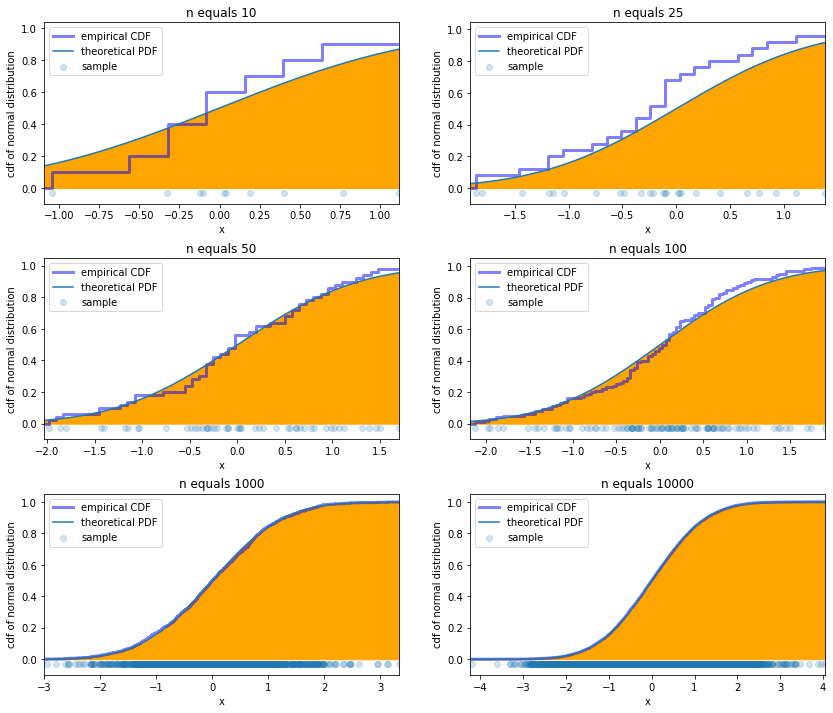

In [114]:
%%time
make_series_of_exp(sample, ns, 10000)

Удивительно. При стремлении n к бесконечности эмпирическая функция распредления все лучше аппроксимирует теоретическую функцию распределения. Воу.

In [39]:
n = 10000
sample = norm_rv.rvs(n)

In [ ]:
%%time
x = list(range(1, n + 1))
def sup_diff_between_theoretical_and_empirical_dist(n):
    vec_diff = np.vectorize(lambda i: abs(sample[:n][sample[:n] < i].size / n - norm_rv.cdf(i)))
    return max(vec_diff(np.linspace(min(sample), max(sample), n)))

dist_vec = np.vectorize(sup_diff_between_theoretical_and_empirical_dist)
dist_val = dist_vec(x)
dist_val_sqrt = []
for i in range(n):
    dist_val_sqrt.append(dist_val[i] * np.sqrt(i + 1))

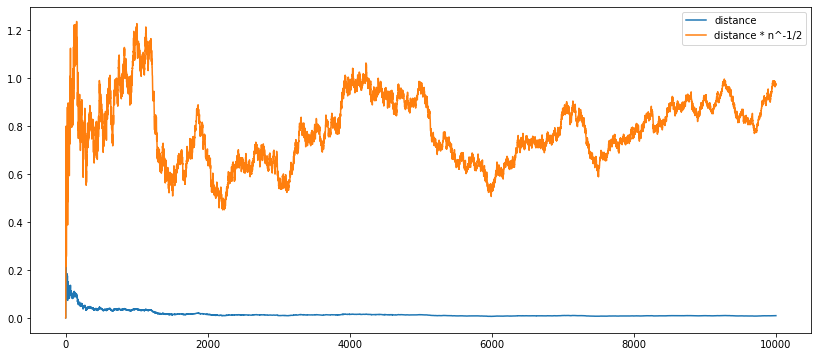

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(x, dist_val, label='distance')
plt.plot(x, dist_val_sqrt, label='distance * n^-1/2')
plt.legend()